# **Quality Rating Prediction**



##  **Introduction**  
The dataset contains **3,957 rows and 6 columns**. It is related to **manufacturing processes**, where the goal might be to analyze or predict **Quality Rating** based on various metrics related to temperature, pressure, and material properties.



#### **Columns Overview:**  
1. **Temperature (°C)** - Temperature of the manufacturing process.
2. **Pressure (kPa)** - Pressure applied during the process.
3. **Temperature x Pressure** - Interaction term calculated by multiplying Temperature and Pressure.
4. **Material Fusion Metric** - A numerical metric related to material fusion.
5. **Material Transformation Metric** - A numerical metric related to material transformation.
6. **Quality Rating** - The quality rating of the manufacturing output (appears to be on a scale close to 100).



#### **Initial Observations:**  
- All columns are of type **float64**.
- No missing values in the dataset.
- The **Temperature x Pressure** column is a derived feature, likely representing the interaction between Temperature and Pressure.
- The **Quality Rating** appears to be the target variable for prediction or evaluation.



### **Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

### **Importing dataset**

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Projects/quality rating.csv')

### **Analysing top 10 data**

In [ ]:
df.head(10)

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000
5,229.178823,8.498306,1947.631786,53136.690654,1.203707e+07,99.998786
6,187.517442,19.412851,3640.248155,42478.694500,6.593260e+06,100.000000
7,278.354600,7.070944,1968.229758,77834.818230,2.156722e+07,95.732723
8,292.732552,20.432896,5981.373734,94223.147069,2.508452e+07,64.623599
9,176.688304,14.145782,2499.394266,34049.372335,5.515789e+06,100.000000


### **Checking information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


### **Renaming columns**

In [ ]:
df.columns=df.columns.str.replace(' ', '_')
df = df.rename(columns={'Temperature_(°C)':'Temperature_degree_C',
                        'Pressure_(kPa)':'Pressure_kPa'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature_degree_C            3957 non-null   float64
 1   Pressure_kPa                    3957 non-null   float64
 2   Temperature_x_Pressure          3957 non-null   float64
 3   Material_Fusion_Metric          3957 non-null   float64
 4   Material_Transformation_Metric  3957 non-null   float64
 5   Quality_Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


### **Checking null values**

In [ ]:
df.isna().sum()

,0
Temperature_degree_C,0
Pressure_kPa,0
Temperature_x_Pressure,0
Material_Fusion_Metric,0
Material_Transformation_Metric,0
Quality_Rating,0


### **Checking duplicate rows**

In [ ]:
df.duplicated().sum()

0

### **Boxplot**

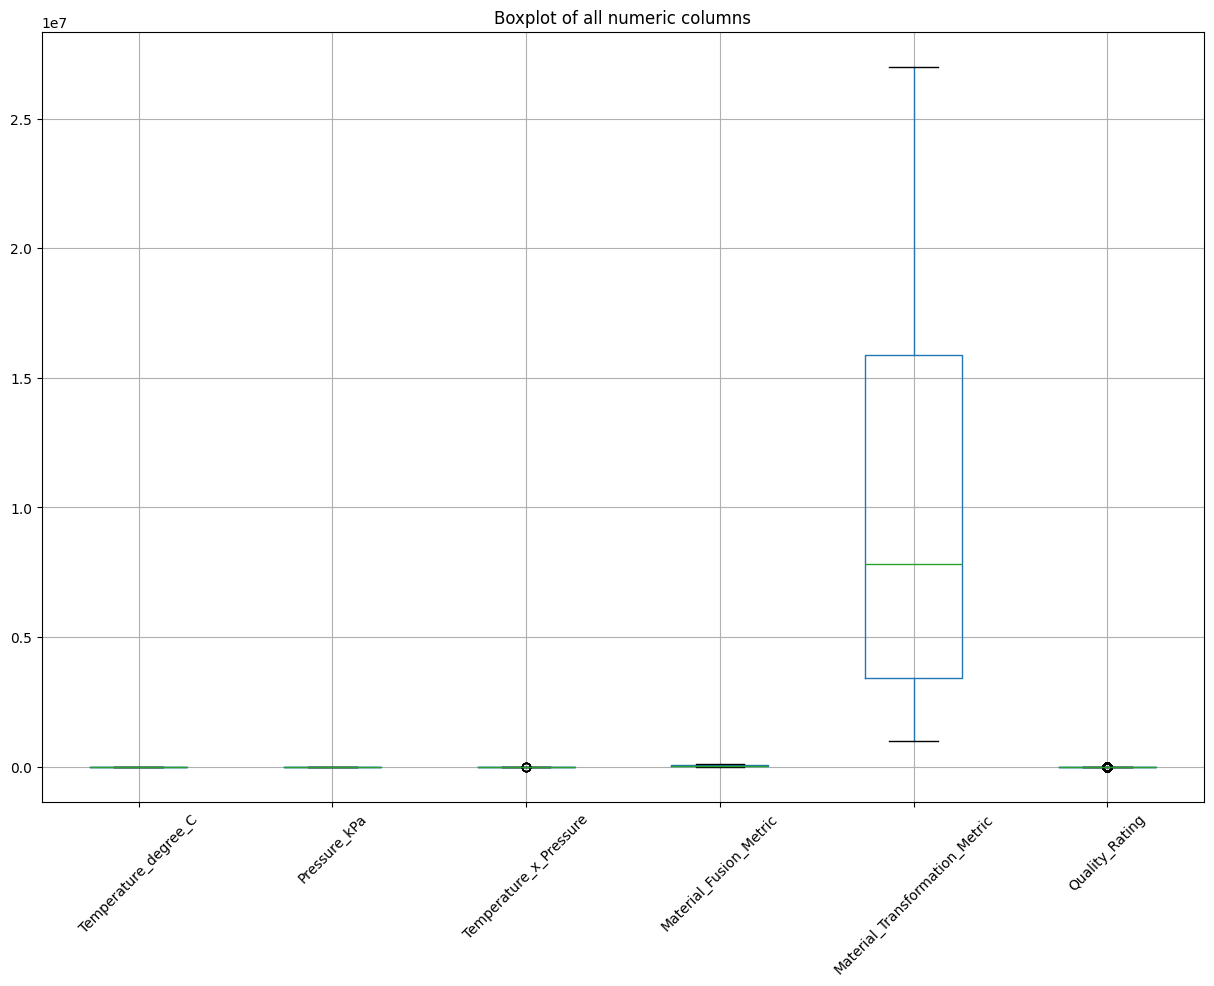

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15,10))
df[numeric_cols].boxplot()
plt.title('Boxplot of all numeric columns')
plt.xticks(rotation=45)
plt.show()

## **Statistical Analysis**

### Covariance

In [ ]:
df.cov(numeric_only=True)

,Temperature_degree_C,Pressure_kPa,Temperature_x_Pressure,Material_Fusion_Metric,Material_Transformation_Metric,Quality_Rating
Temperature_degree_C,3.379762e+03,-8.306549e+00,4.846949e+04,1.349594e+06,4.290748e+08,-3.484103e+02
Pressure_kPa,-8.306549e+00,3.331645e+01,6.511107e+03,2.076729e+04,-1.002801e+06,9.845944e-01
Temperature_x_Pressure,4.846949e+04,6.511107e+03,2.126420e+06,2.412361e+07,6.156690e+09,-4.896953e+03
Material_Fusion_Metric,1.349594e+06,2.076729e+04,2.412361e+07,5.670215e+08,1.767427e+11,-1.583909e+05
Material_Transformation_Metric,4.290748e+08,-1.002801e+06,6.156690e+09,1.767427e+11,5.775021e+13,-5.684602e+07
Quality_Rating,-3.484103e+02,9.845944e-01,-4.896953e+03,-1.583909e+05,-5.684602e+07,1.687989e+02


### Correlation

In [ ]:
df.corr(numeric_only=True)

,Temperature_degree_C,Pressure_kPa,Temperature_x_Pressure,Material_Fusion_Metric,Material_Transformation_Metric,Quality_Rating
Temperature_degree_C,1.000000,-0.024754,0.571743,0.974901,0.971210,-0.461279
Pressure_kPa,-0.024754,1.000000,0.773572,0.151095,-0.022862,0.013129
Temperature_x_Pressure,0.571743,0.773572,1.000000,0.694733,0.555579,-0.258474
Material_Fusion_Metric,0.974901,0.151095,0.694733,1.000000,0.976708,-0.511972
Material_Transformation_Metric,0.971210,-0.022862,0.555579,0.976708,1.000000,-0.575756
Quality_Rating,-0.461279,0.013129,-0.258474,-0.511972,-0.575756,1.000000


### Heatmap

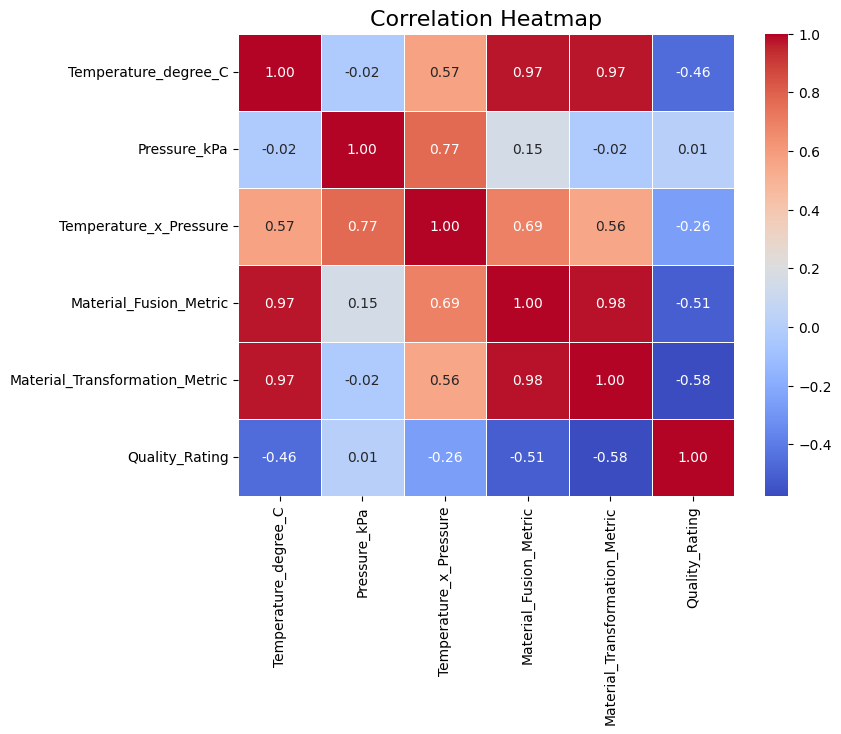

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True) , annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()

### Describe

In [ ]:
df.describe()

,Temperature_degree_C,Pressure_kPa,Temperature_x_Pressure,Material_Fusion_Metric,Material_Transformation_Metric,Quality_Rating
count,3957.000000,3957.000000,3957.000000,3957.000000,3.957000e+03,3957.000000
mean,200.034704,14.815558,2955.321308,48127.183128,1.003645e+07,96.260179
std,58.135717,5.772040,1458.224940,23812.213513,7.599356e+06,12.992262
min,100.014490,5.003008,513.706875,10156.971955,9.999462e+05,1.000000
25%,150.871296,9.692984,1798.247303,27626.929091,3.433810e+06,99.941129
50%,198.603371,14.832557,2678.277782,44611.452164,7.833390e+06,99.999997
75%,251.366552,19.749680,3929.058261,67805.443846,1.588251e+07,100.000000
max,299.992804,24.999132,7365.018714,103756.181544,2.699783e+07,100.000000


### **Bar Chart**

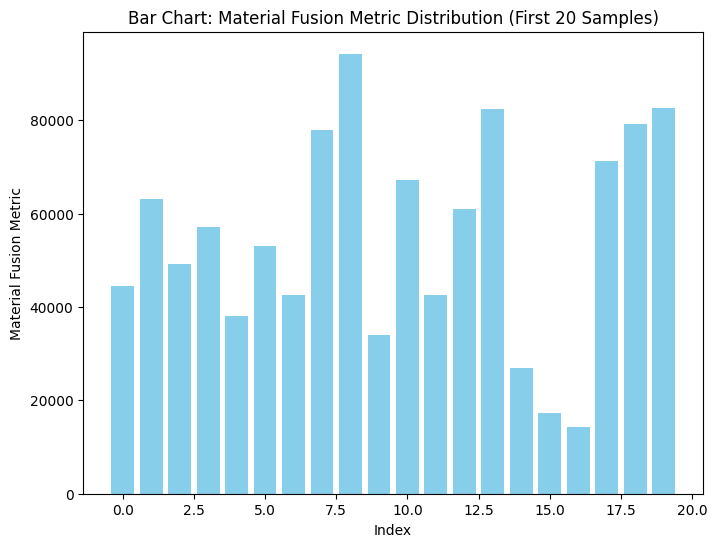

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(df.index[:20], df["Material_Fusion_Metric"][:20], color='skyblue')
plt.title("Bar Chart: Material Fusion Metric Distribution (First 20 Samples)")
plt.xlabel("Index")
plt.ylabel("Material Fusion Metric")
plt.show()

### **Histogram**

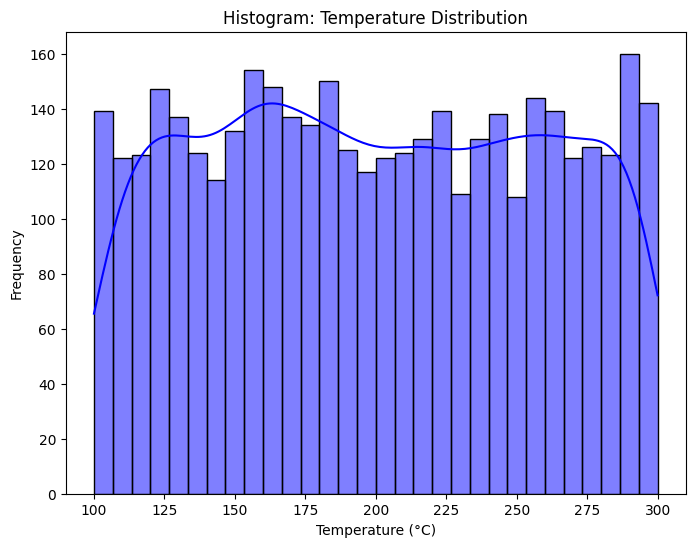

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df["Temperature_degree_C"], bins=30, kde=True, color="blue")
plt.title("Histogram: Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

### **Pie Chart**

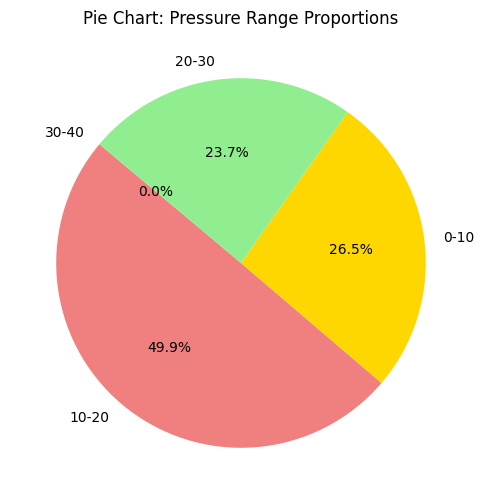

In [ ]:
pressure_bins = pd.cut(df["Pressure_kPa"], bins=[0, 10, 20, 30, 40], labels=["0-10", "10-20", "20-30", "30-40"])
pressure_counts = pressure_bins.value_counts()

plt.figure(figsize=(8, 6))
plt.pie(pressure_counts, labels=pressure_counts.index, autopct='%1.1f%%', colors=["lightcoral", "gold", "lightgreen", "skyblue"], startangle=140)
plt.title("Pie Chart: Pressure Range Proportions")
plt.show()

### **Line Chart**

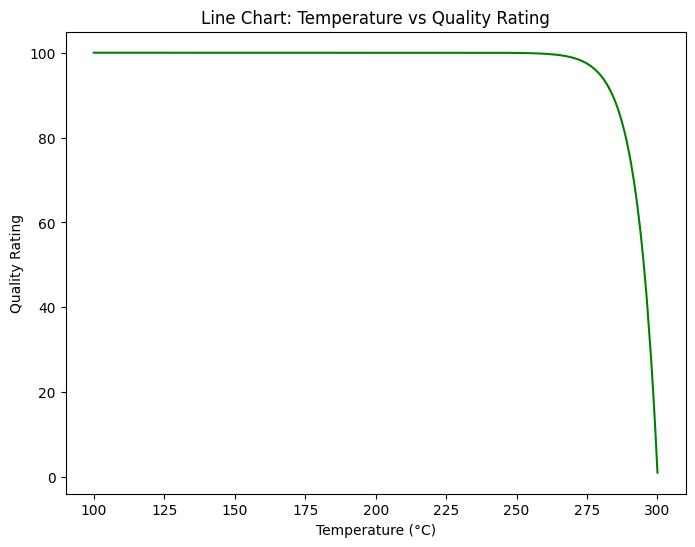

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=df["Temperature_degree_C"], y=df["Quality_Rating"], color="green")
plt.title("Line Chart: Temperature vs Quality Rating")
plt.xlabel("Temperature (°C)")
plt.ylabel("Quality Rating")
plt.show()

### **Selecting x and y**

In [ ]:
x = df.drop('Quality_Rating',axis=1)
y = df['Quality_Rating']

In [ ]:
x.head()

,Temperature_degree_C,Pressure_kPa,Temperature_x_Pressure,Material_Fusion_Metric,Material_Transformation_Metric
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06


In [ ]:
y.head()

,Quality_Rating
0,99.999971
1,99.985703
2,99.999758
3,99.999975
4,100.000000


### **Scatterplot**

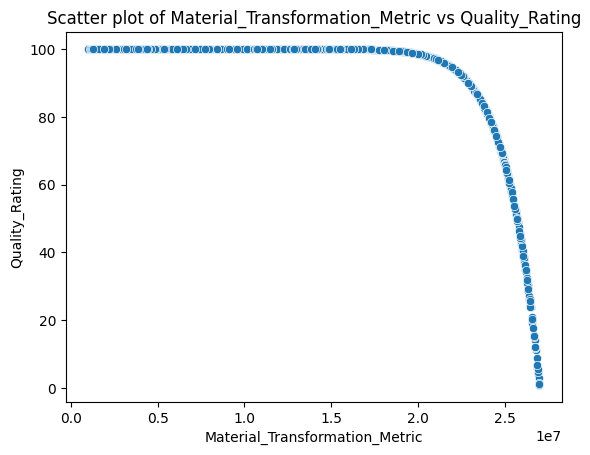

In [ ]:
sns.scatterplot(df,x='Material_Transformation_Metric', y=y)
plt.xlabel('Material_Transformation_Metric')
plt.ylabel('Quality_Rating')
plt.title(f'Scatter plot of Material_Transformation_Metric vs Quality_Rating')
plt.show()

### **Train Test Splitting**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### **Predicting Quality Rating using Polynomial Regression**

In [ ]:
poly = PolynomialFeatures(degree=3)

In [ ]:
x_train = poly.fit_transform(x_train)
x_test = poly.fit_transform(x_test)

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

### **Checking Accuracy**

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
score=r2_score(y_test,y_pred)
print("r2 score is ",score*100,"%")

Mean Absolute Error: 1.842758176806941
Mean Squared Error: 9.017631589392147
Root Mean Squared Error: 3.0029371604134756
r2 score is  95.58285340702656 %


### **Regression Analysis**

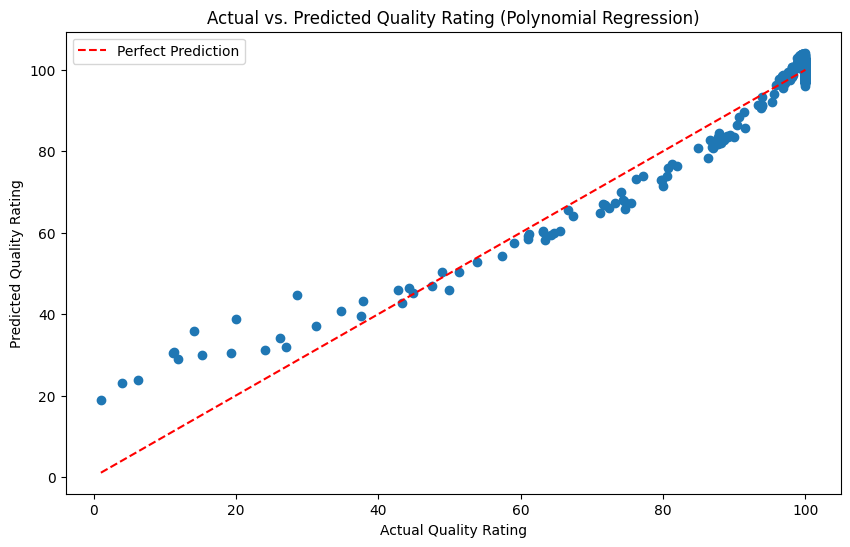

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Quality Rating")
plt.ylabel("Predicted Quality Rating")
plt.title("Actual vs. Predicted Quality Rating (Polynomial Regression)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.legend()
plt.show()

## **Summary**



####  **EDA:**
1. **Data Overview:**
   - **Rows:** 3,957
   - **Columns:** 6
   - All columns are of type **float64**.
   - No missing values or duplicates.

2. **Feature Description:**
   - **Temperature (°C)** - Process temperature.
   - **Pressure (kPa)** - Applied pressure during the process.
   - **Temperature x Pressure** - Interaction term derived from multiplying Temperature and Pressure.
   - **Material Fusion Metric** - Metric indicating material fusion quality.
   - **Material Transformation Metric** - Metric related to material transformation processes.
   - **Quality Rating** (Target Variable) - Quality score close to 100.

3. **Statistical Analysis:**
   - **Covariance and Correlation:** Shows relationships between variables.
   - **Heatmap:** Visualizes correlations, highlighting interactions between variables.

4. **Visualizations:**
   - **Bar Chart:** Material Fusion Metric distribution (First 20 samples).
   - **Histogram:** Temperature distribution with KDE.
   - **Pie Chart:** Pressure range proportions (0-10, 10-20, 20-30, 30-40 kPa).
   - **Line Chart:** Relationship between Temperature and Quality Rating.
   - **Scatter Plot:** Material Transformation Metric vs. Quality Rating.



####  **Modeling:**
1. **Approach:**
   - Predicting **Quality Rating** using **Polynomial Regression (Degree = 3)**.
   
2. **Train-Test Split:**
   - **80% Training, 20% Testing.**

3. **Model Performance:**
   - **Mean Absolute Error (MAE):** Measures average absolute differences between predictions and actual values.
   - **Mean Squared Error (MSE):** Measures average squared differences.
   - **Root Mean Squared Error (RMSE):** Provides error in original units.
   - **R² Score:** Represents the proportion of variance explained by the model.

4. **Regression Analysis:**
   - Scatter plot showing **Actual vs. Predicted Quality Rating** with a perfect prediction line for comparison.

